<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation des librairies requises
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)
print("Configuration Pandas effectuée : toutes les colonnes seront désormais affichées.")

Configuration Pandas effectuée : toutes les colonnes seront désormais affichées.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [3]:
# Chargement des fichiers de données

#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [4]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [5]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("Informations détaillées sur le DataFrame df_erp :")
df_erp.info()

Informations détaillées sur le DataFrame df_erp :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [6]:
# Afficher l'aperçu du DataFrame ERP
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [7]:
# Vérifier l'unicité de product_id dans ERP
nb_doublons_product_id = df_erp['product_id'].duplicated().sum()
print(f"Nombre de doublons pour 'product_id' : {nb_doublons_product_id}")

Nombre de doublons pour 'product_id' : 0


In [15]:
# Afficher les valeurs uniques de stock_status et vérifier la cohérence initiale avec stock_quantity
print("Valeurs uniques 'stock_status':", df_erp['stock_status'].unique())

# Calculer le nombre d'incohérences initiales pour information
incoherences_mask_initial = (
    ((df_erp['stock_status'] == 'instock') & (df_erp['stock_quantity'] <= 0)) |
    ((df_erp['stock_status'] == 'outofstock') & (df_erp['stock_quantity'] > 0))
)
nb_incoherences_initial = incoherences_mask_initial.sum()
print(f"Nombre initial d'incohérences stock_status/stock_quantity: {nb_incoherences_initial}")

Valeurs uniques 'stock_status': ['instock' 'outofstock']
Nombre initial d'incohérences stock_status/stock_quantity: 2


In [16]:
# Créer la colonne stock_status_2 basée sur la logique de stock_quantity
condition_outofstock = df_erp['stock_quantity'] <= 0
df_erp['stock_status_2'] = np.where(condition_outofstock, 'outofstock', 'instock')

In [18]:
# Calculer le masque de comparaison entre stock_status et stock_status_2
comparaison_status = df_erp["stock_status"] == df_erp["stock_status_2"]

In [19]:
# Compter les incohérences entre stock_status et stock_status_2
nombre_incoherences = (~comparaison_status).sum() # Compte les False
print(f"Nombre d'incohérences détectées : {nombre_incoherences}")

Nombre d'incohérences détectées : 2


In [20]:
# Identifier et afficher les lignes incohérentes
lignes_incoherentes = df_erp[~comparaison_status]
if not lignes_incoherentes.empty:
    print("Lignes avec incohérence stock_status/stock_status_2 :")
    # Affichage des colonnes pertinentes pour comprendre l'écart
    print(lignes_incoherentes[['product_id', 'stock_quantity', 'stock_status', 'stock_status_2']])

Lignes avec incohérence stock_status/stock_status_2 :
     product_id  stock_quantity stock_status stock_status_2
4          4039               3   outofstock        instock
398        4885               0      instock     outofstock


In [21]:
# Corriger stock_status en alignant sur la logique de stock_quantity (stock_status_2)
df_erp['stock_status'] = df_erp['stock_status_2']
print("Correction de 'stock_status' effectuée.")

Correction de 'stock_status' effectuée.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [22]:
# Vérifier prix NaN, prix <= 0, et afficher min/max prix dans ERP
prix_null_count = df_erp['price'].isnull().sum()
prix_neg_nul_mask = df_erp['price'] <= 0
prix_neg_nul_count = prix_neg_nul_mask.sum()

print(f"Prix NaN : {prix_null_count}")
print(f"Prix <= 0 : {prix_neg_nul_count}")
if prix_neg_nul_count > 0:
    # Afficher uniquement les ID et prix pour identifier les anomalies demandées
    print(df_erp.loc[prix_neg_nul_mask, ['product_id', 'price']])

print(f"Prix minimum : {df_erp['price'].min()}")
print(f"Prix maximum : {df_erp['price'].max()}")

# Qu'est ce qu'il faut en faire ?
# -> Les prix non renseignés (NaN) et les prix négatifs/nuls sont des anomalies à traiter.
# -> Pour les NaN, il faudra envisager une stratégie (suppression, imputation).
# -> Pour les prix <= 0, c'est probablement une erreur. Une correction basée sur le prix d'achat (imputation basée sur purchase_price)
#    ou une consultation métier serait nécessaire.


Prix NaN : 0
Prix <= 0 : 3
     product_id  price
151        4233  -20.0
469        5017   -8.0
739        6594   -9.1
Prix minimum : -20.0
Prix maximum : 225.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [23]:
# Afficher quantité stock min/max et identifier stocks négatifs dans ERP
print(f"Quantité stock min : {df_erp['stock_quantity'].min()}")
print(f"Quantité stock max : {df_erp['stock_quantity'].max()}")

stock_negatif_mask = df_erp['stock_quantity'] < 0
nb_stock_negatif = stock_negatif_mask.sum()
print(f"Nombre de stocks < 0 : {nb_stock_negatif}")
if nb_stock_negatif > 0:
    # Afficher ID et quantité pour identifier les anomalies
    print(df_erp.loc[stock_negatif_mask, ['product_id', 'stock_quantity']])

# Qu'est ce qu'il faut en faire ?
# -> Les stocks négatifs sont des anomalies. Ils nécessiteront probablement une correction
#    (potentiellement mise à 0 ou investigation métier) lors de la phase de nettoyage. Hypothèses explicatives :
# Une erreur de saisie : la quantité en stock a été mal enregistrée.
# Un problème de gestion des stocks : plus de produits ont été vendus que ce qui était disponible en stock.
# Un produit en rupture de stock : si le stock est à 0 et qu'une vente est enregistrée, cela peut entraîner un stock négatif.


Quantité stock min : -10
Quantité stock max : 145
Nombre de stocks < 0 : 2
     product_id  stock_quantity
449        4973             -10
573        5700              -1


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [24]:
# Afficher les valeurs uniques et la répartition de onsale_web
print("Valeurs uniques 'onsale_web':", df_erp['onsale_web'].unique())
print("\\nRépartition 'onsale_web':")
print(df_erp['onsale_web'].value_counts())

# Interprétation de la signification
# -> Les valeurs sont 0 et 1.
# -> 1 signifie probablement que le produit est marqué comme étant en vente sur le site web.
# -> 0 signifie probablement que le produit n'est pas marqué comme étant en vente sur le site web.

Valeurs uniques 'onsale_web': [1 0]
\nRépartition 'onsale_web':
onsale_web
1    716
0    109
Name: count, dtype: int64


In [25]:
# Quelles sont les colonnes à conserver selon vous?
print("Colonnes actuelles dans df_erp:")
print(df_erp.columns)

# Justification textuelle
print("""
Colonnes à conserver de df_erp et justifications :
- product_id: Clé primaire essentielle pour les jointures.
- onsale_web: Indicateur de vente sur le site web (pertinent pour l'analyse web).
- price: Prix de vente, nécessaire pour le calcul du CA.
- stock_quantity: Quantité en stock, clé pour l'analyse des stocks.
- stock_status: Statut du stock (information brute, à conserver pour l'instant).
- purchase_price: Prix d'achat, nécessaire pour le calcul des marges.

Colonne à supprimer:
- stock_status_2: Redondante, car dérivée de stock_quantity et stock_status existe déjà.
""")

Colonnes actuelles dans df_erp:
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2'],
      dtype='object')

Colonnes à conserver de df_erp et justifications :
- product_id: Clé primaire essentielle pour les jointures.
- onsale_web: Indicateur de vente sur le site web (pertinent pour l'analyse web).
- price: Prix de vente, nécessaire pour le calcul du CA.
- stock_quantity: Quantité en stock, clé pour l'analyse des stocks.
- stock_status: Statut du stock (information brute, à conserver pour l'instant).
- purchase_price: Prix d'achat, nécessaire pour le calcul des marges.

Colonne à supprimer:
- stock_status_2: Redondante, car dérivée de stock_quantity et stock_status existe déjà.



In [26]:
# Supprimer la colonne redondante stock_status_2
if 'stock_status_2' in df_erp.columns: # Vérification optionnelle avant suppression
    df_erp = df_erp.drop('stock_status_2', axis=1)

In [27]:
# Vérification de la suppression
print(df_erp.columns)

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price'],
      dtype='object')


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [28]:
# Vérifier prix d'achat NaN et afficher min/max dans ERP
purchase_price_null_count = df_erp['purchase_price'].isnull().sum()
print(f"Nombre de prix d'achat NaN : {purchase_price_null_count}") # Attendu: 0

print(f"Prix d'achat minimum : {df_erp['purchase_price'].min()}")
print(f"Prix d'achat maximum : {df_erp['purchase_price'].max()}")

Nombre de prix d'achat NaN : 0
Prix d'achat minimum : 2.74
Prix d'achat maximum : 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [29]:
# Dimension du dataset df_web

# Nombre d'observations
print("Nombre d'observations (lignes) dans df_web:", df_web.shape[0])

# Nombre de caractéristiques
print("Nombre de caractéristiques (colonnes) dans df_web:", df_web.shape[1])

Nombre d'observations (lignes) dans df_web: 1513
Nombre de caractéristiques (colonnes) dans df_web: 29


In [30]:
# Afficher les informations sur les colonnes de df_web (types, non-null)
df_web.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [31]:
# Selon vous, quelles sont les colonnes à conserver ?
print(df_web.columns)

# Justification textuelle révisée
print("""
Colonnes à conserver de df_web et justifications :
- sku: Clé essentielle pour la jointure avec la table de liaison et l'ERP.
- total_sales: Quantité de ventes enregistrées sur le site web. Crucial.
- post_name: Nom du produit (utile pour description).
- post_title: Titre du produit (souvent similaire à post_name, garder par prudence).
- tax_status: Statut de taxe (peut être utile pour vérifier la cohérence des calculs de CA/marge).
- product_type: Type de produit (utile pour catégorisation).
- post_type : sert à faire le tri des doublons et différencier entre le produit sur le site et les pièces jointes.

Colonnes sujettes à discussion (suppression ici car vide) :
- rating_count + average_rating : permet de savoir si un produit est populaire et est bien noté ou non, a besoin du rating count pour savoir si le score est représentatif.

Colonnes à supprimer (probablement) :
- Les autres colonnes (virtual, downloadable, dates, content, excerpt, status, author, comments, guid, etc.) sont moins directement pertinentes pour l'analyse principale des ventes, stocks et marges demandée dans ce projet.
""")



Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'product_type', 'post_title',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_password', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

Colonnes à conserver de df_web et justifications :
- sku: Clé essentielle pour la jointure avec la table de liaison et l'ERP.
- total_sales: Quantité de ventes enregistrées sur le site web. Crucial.
- post_name: Nom du produit (utile pour description).
- post_title: Titre du produit (souvent similaire à post_name, garder par prudence).
- tax_status: Statut de taxe (peut être utile pour vérifier la cohérence des calculs de CA/marge).
- product_type: Type de produit (utile pour cat

In [32]:
# Supprimer les colonnes web non pertinentes
colonnes_a_garder = ['sku', 'total_sales', 'tax_status', 'product_type',
                     'post_title', 'post_name', 'post_type']
# Garder uniquement les colonnes sélectionnées (plus sûr que de lister celles à supprimer)
df_web = df_web[colonnes_a_garder]
print(f"Colonnes conservées dans df_web: {df_web.columns.tolist()}")

Colonnes conservées dans df_web: ['sku', 'total_sales', 'tax_status', 'product_type', 'post_title', 'post_name', 'post_type']


In [35]:
import re

# Visualisation des valeurs de la colonne sku
all_skus = df_web['sku'].unique()


# Quelles sont les valeurs qui ne semblent pas respecter la règle de codification?
# Règle : Doit être une séquence de 1 à 20 chiffres uniquement.

# Définir l'expression régulière pour un sku valide (1 à 20 chiffres)
regex_sku_valide = r"^\d{1,20}$"

# Identifier les sku NON NULS qui ne respectent PAS le format regex
# 1. Masque pour les non-nuls
mask_notnull = df_web['sku'].notnull()
# 2. Masque pour ceux qui correspondent au format (convertir en str avant)
#    Utilisation de na=False pour que les NaN originaux ne soient pas considérés comme matchant
mask_format_ok = df_web['sku'].astype(str).str.match(regex_sku_valide, na=False)

# 3. Masque combiné : Non nul ET format PAS OK
mask_anormal = mask_notnull & (~mask_format_ok)

# Extraire les valeurs uniques des SKU anormaux
skus_anormaux = df_web.loc[mask_anormal, 'sku'].unique()

if len(skus_anormaux) > 0:
    print("\nValeurs 'sku' non-nulles qui ne respectent pas le format (1-20 chiffres) :")
    print(skus_anormaux)
else:
    print("\nToutes les valeurs 'sku' non-nulles respectent le format attendu (1-20 chiffres).")

# Note: Les valeurs NaN natives sont aussi à considérer comme problématiques pour la jointure.
nan_sku_count = df_web['sku'].isnull().sum()
if nan_sku_count > 0:
    print(f"\nIl y a également {nan_sku_count} valeur(s) NaN dans la colonne 'sku'.")


Valeurs 'sku' non-nulles qui ne respectent pas le format (1-20 chiffres) :
['13127-1' 'bon-cadeau-25-euros']

Il y a également 85 valeur(s) NaN dans la colonne 'sku'.


# Analyse des anomalies SKU & stratégie de traitement

*   **SKUs Manquants (85) :** Empêchent la liaison avec l'ERP. Seront exclus lors de la fusion.
*   **SKUs Format Incorrect (2) :** Non directement liables aux `product_id`. Seront exclus lors de la fusion (`INNER JOIN` sur clés valides).
*   **Stratégie :** Focalisation sur les produits liables. Exclusion des lignes web avec SKU invalide ou manquant lors de la fusion finale.

In [38]:
# Vérifier l'unicité des SKU dans df_web
nb_lignes_total = len(df_web)
nb_sku_uniques = df_web['sku'].nunique(dropna=False)

print(f"Les SKU sont ils uniques ? {nb_lignes_total == nb_sku_uniques}")
if nb_lignes_total != nb_sku_uniques:
    nb_sku_dupliques_distincts = df_web[df_web['sku'].duplicated(keep=False)]['sku'].nunique()
    print(f"  (Nombre de SKU distincts (hors NaN) dupliqués : {nb_sku_dupliques_distincts})")

Les SKU sont ils uniques ? False
  (Nombre de SKU distincts (hors NaN) dupliqués : 714)


In [39]:
# Vérifier le contenu des lignes où SKU est NaN
lignes_sans_sku = df_web[df_web['sku'].isnull()]
print(f"Informations sur les {len(lignes_sans_sku)} lignes sans SKU:")
lignes_sans_sku.info()


Informations sur les 85 lignes sans SKU:
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   tax_status    2 non-null      object 
 3   product_type  2 non-null      object 
 4   post_title    2 non-null      object 
 5   post_name     2 non-null      object 
 6   post_type     2 non-null      object 
dtypes: float64(1), object(6)
memory usage: 5.3+ KB


# Que constatez-vous?
Observations :

85 lignes sans SKU : Il y a 85 lignes dans le DataFrame où la colonne sku est entièrement vide (0 valeurs non nulles).
Informations partielles : Les colonnes total_sales, product_type, et post_name ne sont renseignées que pour 2 de ces 85 lignes.
Les 83 autres lignes ont des valeurs manquantes (NaN) pour ces colonnes.

Interprétation :
La majorité des lignes sans code article (SKU) sont presque vides d'informations. Seules 2 d'entre elles ont des données pour les ventes, le type de produit et le nom du produit.

Conséquences :
Cela signifie que ces 83 lignes sans SKU et sans autres informations significatives sont peu utiles pour l'analyse. Elles ne fournissent pas de données exploitables sur les produits, les ventes, ou les caractéristiques.

Actions recommandées :
Suppression : La solution la plus simple et la plus logique est de supprimer ces 83 lignes du DataFrame. Elles n'apportent pas d'information pertinente pour l'analyse.
Pour les 2 lignes qui ont des données pour total_sales, product_type, et post_name, il serait utile d'enquêter pour comprendre pourquoi le SKU est manquant. Est-il possible de retrouver le SKU correspondant ? Si oui, corrigez les données. Sinon, il faudra décider si ces 2 lignes sont suffisamment importantes pour être conservées malgré le SKU manquant.

Justification de la suppression :
Qualité des données : Les lignes vides ou presque vides dégradent la qualité des données et peuvent fausser les analyses.
Efficacité : Supprimer ces lignes inutiles rendra le DataFrame plus compact et plus facile à manipuler.
Pertinence : L'analyse se concentrera sur les données significatives et exploitables.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [40]:
# Afficher les dimensions de df_liaison
print(f"Dimensions df_liaison (lignes, colonnes): {df_liaison.shape}")

Dimensions df_liaison (lignes, colonnes): (825, 2)


In [41]:
# Afficher les informations sur les colonnes de df_liaison
df_liaison.info()
# Note: Le type 'object' pour id_web suggère des valeurs non numériques ou mixtes (anomalie).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [42]:
# Vérifier l'unicité de product_id dans df_liaison
is_unique = df_liaison['product_id'].is_unique
print(f"Les product_id dans df_liaison sont uniques : {is_unique}")

Les product_id dans df_liaison sont uniques : True


In [44]:
# Vérifier l'unicité des id_web non-NaN et compter les NaN dans df_liaison
id_web_non_nan = df_liaison['id_web'].dropna()
is_unique_non_nan = id_web_non_nan.is_unique
nb_nan_id_web = df_liaison['id_web'].isnull().sum()

print(f"Les id_web non-NaN sont uniques : {is_unique_non_nan}")
print(f"Nombre de id_web manquants (NaN) : {nb_nan_id_web}")

Les id_web non-NaN sont uniques : True
Nombre de id_web manquants (NaN) : 91


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [45]:
# Fusionner df_erp et df_liaison en df_merge (LEFT JOIN sur product_id)
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='left')
print(f"Dimensions df_merge: {df_merge.shape}")

Dimensions df_merge: (825, 7)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [46]:
# Préparer df_web: filtrer type='product', supprimer SKU NaN/dupliqués
df_web_cleaned = df_web[df_web['post_type'] == 'product'].copy()
df_web_cleaned.dropna(subset=['sku'], inplace=True)
df_web_cleaned.drop_duplicates(subset=['sku'], keep='first', inplace=True)

# Préparer df_merge: filtrer pour garder id_web valides (non-NaN)
df_merge_filtré = df_merge.dropna(subset=['id_web']).copy()

# Fusion finale INNER JOIN sur id_web et sku
df_final = pd.merge(df_merge_filtré, df_web_cleaned,
                    left_on='id_web', right_on='sku', how='inner')

# Supprimer colonne redondante id_web (garder sku)
if 'id_web' in df_final.columns:
   df_final = df_final.drop(columns=['id_web'])

# Afficher les dimensions finales pour vérification
print(f"Dimensions df_final (après fusion et nettoyage): {df_final.shape}")

Dimensions df_final (après fusion et nettoyage): (714, 13)


Étape bonus : Cohérence des Données Produits "En Ligne"

Je me suis rendu compte qu'il y avait seulement 91 produits sans identifiant web dans la table de liaison, alors que l'ERP indiquait 109 produits comme étant 'offline' (onsale_web = 0). Pour comprendre cet écart de 18 produits et vérifier la cohérence globale, j'ai procédé comme suit :

Étape 1 : Confirmer que les 91 liens manquants concernent bien (une partie) des produits 'offline'.

Action Concrète : J'ai vérifié si les 91 product_id sans id_web dans la table de liaison étaient tous bien présents parmi les 109 produits marqués onsale_web = 0 dans l'ERP.
Résultat Attendu/Constaté : Confirmation que ces 91 produits sont bien un sous-ensemble des produits "offline".


Étape 2 : Identifier et examiner les 18 'anomalies' (produits 'offline' avec un lien web).

Action Concrète : J'ai isolé et listé les 18  qui étaient marqués onsale_web = 0 dans l'ERP mais qui possédaient quand même un id_web (non-NaN) dans la table de liaison. J'ai aussi regardé si ces id_web avaient un format standard ou spécial (comme 'bon-cadeau...').
Résultat Attendu/Constaté : Identification précise des 18 produits à l'origine de l'écart 109 vs 91. Confirmation que les formats non standards ('bon-cadeau...', '13127-1') existent mais concernent peu de cas.


Étape 3 : Vérifier si les produits ERP 'online' sont effectivement présents sur le web.

Action Concrète : "J'ai contrôlé, après avoir fusionné toutes les tables (df_final), si tous les produits marqués onsale_web = 1 avaient bien des informations correspondantes issues du site web (comme un post_title non manquant)."
Résultat Attendu/Constaté : Identification des produits "orphelins" déclarés en vente mais absents des données web finales ([X cas trouvés]).


Étape 4 : Vérifier si les produits ERP 'offline' apparaissent quand même sur le web.

Action Concrète : "Enfin, j'ai vérifié si des produits marqués onsale_web = 0 (y compris les 18 anomalies identifiées à l'étape 2) se retrouvaient quand même avec des données web dans la table finale df_final."
Résultat Attendu/Constaté : Confirmation que certains produits "offline" ERP ont bien une présence web résiduelle ou active ([Y cas trouvés]), renforçant l'idée d'une désynchronisation.


Conclusion de la Démarche :

"Cette approche en 4 étapes m'a permis de décomposer le problème, d'expliquer l'écart numérique initial (109 vs 91) en identifiant les 18 produits 'offline' avec un lien, et de confirmer les différents types d'incohérences entre le statut déclaré dans l'ERP et la réalité des données web après consolidation."


In [47]:
# Vérifier la correspondance entre les id_web manquants et le statut 'offline' ERP
ids_sans_lien_liaison = df_liaison.loc[df_liaison['id_web'].isnull(), 'product_id'].unique()

# Compter combien parmi eux sont offline (onsale_web == 0) dans df_erp
nb_sans_lien_qui_sont_offline = df_erp[
    (df_erp['product_id'].isin(ids_sans_lien_liaison)) &
    (df_erp['onsale_web'] == 0)
].shape[0]
nb_sans_lien_total = len(ids_sans_lien_liaison)

print(f"Sur {nb_sans_lien_total} produits sans id_web, {nb_sans_lien_qui_sont_offline} sont marqués 'offline' dans l'ERP.")

Sur 91 produits sans id_web, 88 sont marqués 'offline' dans l'ERP.


In [49]:
# Compter les produits ERP marqués 'offline' mais ayant un id_web dans df_merge
mask_offline_avec_lien = (df_merge['onsale_web'] == 0) & (df_merge['id_web'].notnull())
nb_offline_avec_lien = mask_offline_avec_lien.sum()

print(f"Nombre de produits 'offline' avec un id_web : {nb_offline_avec_lien}")

if nb_offline_avec_lien > 0:
  print(f"  IDs concernés: {df_merge.loc[mask_offline_avec_lien, 'product_id'].unique().tolist()}")

Nombre de produits 'offline' avec un id_web : 21
  IDs concernés: [4200, 4289, 4568, 4584, 4741, 4864, 4869, 4921, 4922, 5018, 5021, 5505, 5559, 5570, 5800, 5953, 5954, 5955, 5957, 6100, 7329]


Il y a des produits que l'ERP considère comme étant "en vente en ligne" mais pour lesquels la table de liaison ne fournit aucun identifiant web (id_web est manquant).

Conséquences / Implications :

Désynchronisation Critique : C'est une autre forme d'incohérence grave. Ces produits devraient être liés aux données web (puisque onsale_web = 1), mais le lien est cassé au niveau de la table de liaison.

Impossible de les joindre aux données Web : Même s'ils existent peut-être sur le site web, sans id_web dans la liaison, la fusion échouera pour eux. Ils feront partie des lignes sans correspondance web dans df_final.

Cause Possible : Oubli de mise à jour de la table de liaison lors de l'ajout du produit sur le site ou lors de son passage en statut "online" dans l'ERP, ou suppression erronée de l'id_web dans la liaison.

In [53]:
# Identifier les produits 'online' (ERP) mais sans id_web dans la liaison
ids_sans_lien_liaison = df_liaison.loc[df_liaison['id_web'].isnull(), 'product_id'].unique() # Redéfini pour autonomie

mask_online_sans_lien = (df_erp['onsale_web'] == 1) & (df_erp['product_id'].isin(ids_sans_lien_liaison))
df_online_sans_lien = df_erp[mask_online_sans_lien]
nb_online_sans_lien = len(df_online_sans_lien)

print(f"Nombre de produits 'online' sans id_web : {nb_online_sans_lien}")
if nb_online_sans_lien > 0:
    print(f"  IDs concernés : {df_online_sans_lien['product_id'].tolist()}")
# Affichage du stock pour ces produits
    print(df_online_sans_lien[['product_id', 'stock_quantity']])

Nombre de produits 'online' sans id_web : 3
  IDs concernés : [4594, 5070, 5075]
     product_id  stock_quantity
242        4594               0
486        5070               0
487        5075               0


Implications : les produits n'ayant pas de stock ne sont répertoriés comme disponible à la vente en ligne sur la table de liaison.

In [54]:
# Vérifier si des produits marqués 'offline' sont présents dans df_final
offline_in_final = df_final[df_final['onsale_web'] == 0]
nb_offline_in_final = offline_in_final['product_id'].nunique()

print(f"Nombre de produits 'offline' présents dans df_final : {nb_offline_in_final}")
if nb_offline_in_final > 0:
    print(f"  ID(s) concerné(s) : {offline_in_final['product_id'].unique().tolist()}")

Nombre de produits 'offline' présents dans df_final : 1
  ID(s) concerné(s) : [4200]


In [55]:
# Calculer le CA généré par les produits 'offline' présents dans df_final

# Assurer l'existence de la colonne 'ca_par_article'
if 'ca_par_article' not in df_final.columns:
    df_final['total_sales'] = pd.to_numeric(df_final['total_sales'], errors='coerce').fillna(0)
    df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']

# Filtrer et calculer le CA
offline_in_final = df_final[df_final['onsale_web'] == 0]
ca_offline_products = offline_in_final['ca_par_article'].sum()

print(f"CA total des produits 'offline' présents dans df_final : {ca_offline_products:,.2f} €")

CA total des produits 'offline' présents dans df_final : 81.20 €


In [57]:
# Comparer le nombre de produits 'online' ERP vs df_final et identifier les écarts

# 1. Compter les produits 'online' dans ERP
ids_online_erp = df_erp.loc[df_erp['onsale_web'] == 1, 'product_id'].unique()
nb_online_erp = len(ids_online_erp)

# 2. Compter les produits dans df_final
ids_in_final = df_final['product_id'].unique()
nb_in_final = len(ids_in_final)

print(f"Nombre de produits 'online' dans ERP : {nb_online_erp}")
print(f"Nombre de produits dans df_final    : {nb_in_final}")

# 3. Identifier les 'online' ERP absents de df_final
ids_online_manquants_final = np.setdiff1d(ids_online_erp, ids_in_final)
print(f"Produits 'online' ERP absents de df_final ({len(ids_online_manquants_final)}): {ids_online_manquants_final.tolist()}")

# 4. Identifier les 'offline' ERP présents dans df_final (calculé précédemment)
ids_offline_presents_final = df_final.loc[df_final['onsale_web'] == 0, 'product_id'].unique()
print(f"Produits 'offline' ERP présents dans df_final ({len(ids_offline_presents_final)}): {ids_offline_presents_final.tolist()}")

Nombre de produits 'online' dans ERP : 716
Nombre de produits dans df_final    : 714
Produits 'online' ERP absents de df_final (3): [4594, 5070, 5075]
Produits 'offline' ERP présents dans df_final (1): [4200]


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

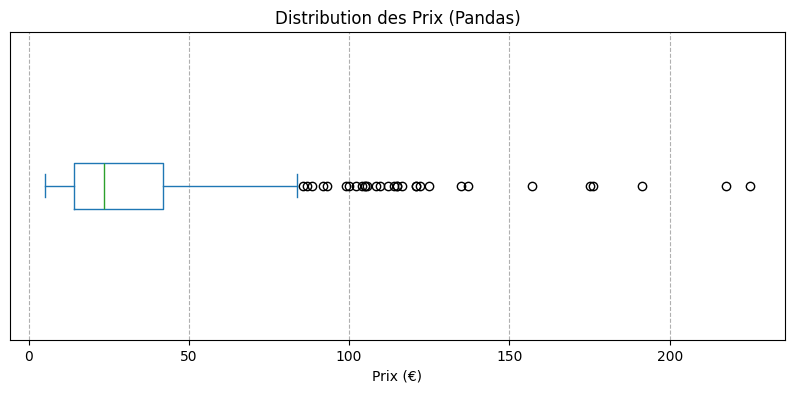

In [60]:
# Création d'une Boite à moustache de la répartition des prix grâce à Pandas
plt.figure(figsize=(10, 4))
df_final['price'].plot.box(vert=False)
plt.title('Distribution des Prix (Pandas)')
plt.xlabel('Prix (€)')
plt.yticks([])
plt.grid(axis='x', linestyle='--')
plt.show()

In [62]:
# Générer un boxplot horizontal interactif des prix avec Plotly Express
fig_plotly = px.box(df_final, x="price", orientation='h', points='outliers',
                    title="Distribution des Prix (Plotly Express)", labels={'price': 'Prix (€)'})
fig_plotly.update_layout(height=300)
fig_plotly.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [63]:
# Calculer la moyenne du prix
prix_moyen = df_final['price'].mean()
print(f"Moyenne des prix : {prix_moyen:.2f} €")

# Calculer l'écart-type du prix
prix_std = df_final['price'].std()
print(f"Écart-type des prix : {prix_std:.2f} €")

# Calculer le Z-score pour chaque prix
df_final['zscore_price'] = (df_final['price'] - prix_moyen) / prix_std
print("\nColonne 'zscore_price' calculée.")

# Afficher les 5 premières lignes avec le prix et le Z-score calculé
print("\nAperçu des prix et de leurs Z-scores correspondants :")
print(df_final[['product_id', 'price', 'zscore_price']].head())

Moyenne des prix : 32.33 €
Écart-type des prix : 27.60 €

Colonne 'zscore_price' calculée.

Aperçu des prix et de leurs Z-scores correspondants :
   product_id  price  zscore_price
0        3847   24.2     -0.294738
1        3849   34.3      0.071253
2        3850   20.8     -0.417943
3        4032   14.1     -0.660729
4        4039   46.0      0.495222


In [64]:
# Calculer le seuil prix correspondant à un Z-score de 3
seuil_prix_z3 = prix_moyen + 3 * prix_std

print(f"Le seuil de prix correspondant à un Z-score de 3 est : {seuil_prix_z3:.2f} €")

Le seuil de prix correspondant à un Z-score de 3 est : 115.12 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [66]:
# Utilisation de la fonction describe() pour l'étude des mesures de dispersions sur la colonne 'price'
print("Statistiques descriptives pour la colonne 'price':")
description_prix = df_final['price'].describe()
print(description_prix)

Statistiques descriptives pour la colonne 'price':
count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64


In [68]:
#Définissez un seuil pour les articles "outliers" en prix

# Calcul de l'IQR pour la colonne 'price'
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1

# Définition des limites pour identifier les outliers
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

print(f"Calcul des seuils pour les outliers de prix (Méthode IQR):")
print(f" - Q1 (25ème percentile) : {Q1:.2f} €")
print(f" - Q3 (75ème percentile) : {Q3:.2f} €")
print(f" - Écart Interquartile (IQR) : {IQR:.2f} €")
print(f" - Seuil inférieur (Q1 - 1.5*IQR) : {limite_inferieure:.2f} €")
print(f" - Seuil supérieur (Q3 + 1.5*IQR) : {limite_superieure:.2f} €")

# Identification des outliers
outliers_iqr = df_final[(df_final['price'] < limite_inferieure) | (df_final['price'] > limite_superieure)]

Calcul des seuils pour les outliers de prix (Méthode IQR):
 - Q1 (25ème percentile) : 14.06 €
 - Q3 (75ème percentile) : 42.08 €
 - Écart Interquartile (IQR) : 28.01 €
 - Seuil inférieur (Q1 - 1.5*IQR) : -27.96 €
 - Seuil supérieur (Q3 + 1.5*IQR) : 84.09 €


In [70]:
# Calculer et afficher le nombre et la proportion d'outliers de prix (IQR)
nombre_outliers_iqr = len(outliers_iqr)
total_articles_catalogue = len(df_final)
proportion_outliers_iqr = (nombre_outliers_iqr / total_articles_catalogue) * 100

print(f"Nombre d'outliers prix (IQR) : {nombre_outliers_iqr}")
print(f"Proportion outliers prix : {proportion_outliers_iqr:.2f} %")

Nombre d'outliers prix (IQR) : 31
Proportion outliers prix : 4.34 %


In [73]:
# Analyser qualitativement les outliers de prix (IQR)
print(f"Analyse qualitative des {len(outliers_iqr)} outliers de prix (prix > {limite_superieure:.2f} €):")

# Afficher les infos clés des 10 plus chers pour l'analyse
cols_analyse = ['product_id', 'post_title', 'price', 'purchase_price', 'total_sales']
cols_existantes = [c for c in cols_analyse if c in outliers_iqr.columns]
print("\\nTop 10 des outliers par prix :")
print(outliers_iqr.nlargest(10, 'price')[cols_existantes])

# Conclusion de l'analyse qualitative
print("Conclusion: Majorité probablement justifiée (produits luxe/rares). Vérification métier ponctuelle recommandée.")

Analyse qualitative des 31 outliers de prix (prix > 84.09 €):
\nTop 10 des outliers par prix :
     product_id                                         post_title  price  \
199        4352     Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0   
426        5001     David Duband Charmes-Chambertin Grand Cru 2014  217.5   
587        5892  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  191.3   
218        4402                               Cognac Frapin VIP XO  176.0   
553        5767                Camille Giroud Clos de Vougeot 2016  175.0   
221        4406  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0   
381        4904  Domaine Des Croix Corton Charlemagne Grand Cru...  137.0   
642        6126             Champagne Gosset Célébris Vintage 2007  135.0   
511        5612  Domaine Weinbach Gewurztraminer Grand Cru Furs...  124.8   
603        5917  Wemyss Malts Single Cask Scotch Whisky Choc 'n...  122.0   

     purchase_price  total_sales  
199          137.81   

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [74]:
# Calculer et afficher le CA total (basé sur df_final)
df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']
ca_total = df_final['ca_par_article'].sum()
print(f"Chiffre d'affaires total (périmètre df_final) : {ca_total:,.2f} €")

Chiffre d'affaires total (périmètre df_final) : 143,680.10 €


In [81]:
# Visualiser le top 20 produits par CA

# Trier par CA décroissant et sélectionner le top 20
df_palmares_ca = df_final.sort_values(by='ca_par_article', ascending=False).head(20)

# Déterminer la colonne nom produit
colonne_nom_produit = 'post_title' if 'post_title' in df_palmares_ca.columns else 'post_name'

# Créer le graphique en barres horizontales
fig_top_ca = px.bar(
    df_palmares_ca,
    x='ca_par_article',
    y=colonne_nom_produit,
    orientation='h',
    title='Top 20 Produits par CA',
    labels={colonne_nom_produit: 'Produit', 'ca_par_article': 'CA (€)'}

)

fig_top_ca.update_layout(
    yaxis={'categoryorder':'array',
           'categoryarray': df_palmares_ca[colonne_nom_produit].tolist()[::-1]}
           # On fournit la liste INVERSÉE des noms pour que le 1er nom soit en haut
)

fig_top_ca.show()

In [83]:
# Calculer le Pareto du CA (80/20)

# Trier par CA et calculer la part cumulée
df_pareto_ca = df_final.sort_values(by='ca_par_article', ascending=False).copy()
df_pareto_ca['ca_cumul_prop'] = (df_pareto_ca['ca_par_article'].cumsum() / ca_total)

# Trouver le nombre d'articles pour atteindre 80%
nb_articles_80_ca = df_pareto_ca[df_pareto_ca['ca_cumul_prop'] <= 0.8].shape[0] + 1 # +1 car on cherche celui qui dépasse

# Calculer la proportion de ces articles dans le catalogue
total_articles_catalogue = len(df_final)
proportion_articles_80_ca = (nb_articles_80_ca / total_articles_catalogue) * 100

print(f"Nombre d'articles pour ~80% du CA : {nb_articles_80_ca}")
print(f"Proportion de ces articles : {proportion_articles_80_ca:.2f} %")

Nombre d'articles pour ~80% du CA : 435
Proportion de ces articles : 60.92 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [108]:
# Visualiser le top 20 produits par quantité vendue

# Trier par quantité décroissante et sélectionner le top 20
df_palmares_qte = df_final.sort_values(by='total_sales', ascending=False).head(20)

# Déterminer la colonne nom produit
colonne_nom_produit = 'post_title' if 'post_title' in df_palmares_qte.columns else 'post_name'

# Créer le graphique en barres horizontales
fig_top_qte = px.bar(
    df_palmares_qte,
    x='total_sales',
    y=colonne_nom_produit,
    orientation='h',
    title='Top 20 Produits par Quantité Vendue',
    labels={colonne_nom_produit: 'Produit', 'total_sales': 'Quantité Vendue'}
)

fig_top_qte.update_layout(
    yaxis={'categoryorder':'array',
           'categoryarray': df_palmares_qte[colonne_nom_produit].tolist()[::-1]}
           # Fournir la liste INVERSÉE des noms pour l'ordre d'affichage
)

fig_top_qte.show()

In [86]:
# Calculer le Pareto des Quantités Vendues (80/20)

# Trier par quantité et calculer la part cumulée
df_pareto_qte = df_final.sort_values(by='total_sales', ascending=False).copy()
quantite_totale = df_final['total_sales'].sum()
df_pareto_qte['qte_cumul_prop'] = (df_pareto_qte['total_sales'].cumsum() / quantite_totale)

# Trouver le nombre d'articles pour atteindre 80%
nb_articles_80_qte = df_pareto_qte[df_pareto_qte['qte_cumul_prop'] <= 0.8].shape[0] + 1

# Calculer la proportion de ces articles
total_articles_catalogue = len(df_final)
proportion_articles_80_qte = (nb_articles_80_qte / total_articles_catalogue) * 100

print(f"Nombre d'articles pour ~80% des quantités vendues : {nb_articles_80_qte}")
print(f"Proportion de ces articles : {proportion_articles_80_qte:.2f} %")

Nombre d'articles pour ~80% des quantités vendues : 434
Proportion de ces articles : 60.78 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [109]:
# Visualiser le flop 20 produits par temps de rotation (ventes > 0, rotation la plus longue en haut)

# Calculer la rotation en mois, ignorer ventes=0 ou stock<0
df_final['rotation_stock_mois'] = np.where(
    (df_final['total_sales'] > 0) & (df_final['stock_quantity'] >= 0),
    df_final['stock_quantity'] / df_final['total_sales'],
    np.nan
)

# Trier par rotation décroissante et sélectionner le flop 20
df_flop20_rotation = df_final.dropna(subset=['rotation_stock_mois']).nlargest(20, 'rotation_stock_mois')

# Déterminer la colonne nom produit
colonne_nom_produit = 'post_title' if 'post_title' in df_flop20_rotation.columns else 'post_name'

# Créer le graphique
fig_flop_rotation = px.bar(
    df_flop20_rotation,
    x='rotation_stock_mois',
    y=colonne_nom_produit,
    orientation='h',
    title='Flop 20 Produits par Temps de Rotation (Mois, Ventes > 0)',
    labels={colonne_nom_produit: 'Produit', 'rotation_stock_mois': 'Mois de Stock'}

)
fig_flop_rotation.update_layout(
    yaxis={'categoryorder':'array',
           'categoryarray': df_flop20_rotation[colonne_nom_produit].tolist()[::-1]}
           # Fournir la liste INVERSÉE des noms
)

fig_flop_rotation.show()

# Identification des dormants (pour info, lié à la cellule 57 du PDF)
stock_zero_vente = df_final[(df_final['stock_quantity'] > 0) & (df_final['total_sales'] == 0)]
print(f"\nNombre de produits dormants (stock>0, ventes=0) : {len(stock_zero_vente)}")
if not stock_zero_vente.empty:
    print(f"  IDs dormants: {stock_zero_vente['product_id'].tolist()}")


Nombre de produits dormants (stock>0, ventes=0) : 3
  IDs dormants: [4337, 4355, 5932]


In [95]:
# Calculer le temps de rotation global du stock
(df_final["stock_quantity"]*df_final["price"]).sum()/df_final["ca_par_article"].sum()

np.float64(3.442323606400609)

In [93]:
# Calculer la somme de la colonne stock_quantity

# Somme en excluant les valeurs négatives
stock_total_unites_positif = df_final.loc[df_final['stock_quantity'] >= 0, 'stock_quantity'].sum()
print(f"Nombre total d'unités physiques en stock (quantité >= 0) : {stock_total_unites_positif:,.0f}")

Nombre total d'unités physiques en stock (quantité >= 0) : 16,740


In [96]:
# Calculer la valorisation totale des stocks (basée sur prix d'achat)

# Créer colonnes numériques sécurisées (met 0 si stock neg, NaN si purch_price <=0 ou non num)
stock_q_numeric = pd.to_numeric(df_final['stock_quantity'], errors='coerce').fillna(0)
stock_q_numeric[stock_q_numeric < 0] = 0
purch_p_numeric = pd.to_numeric(df_final['purchase_price'], errors='coerce')
purch_p_numeric[purch_p_numeric <= 0] = np.nan

# Calcul direct de la valorisation totale en ignorant les NaN
df_final['valeur_stock_euros'] = stock_q_numeric * purch_p_numeric
valorisation_totale_stocks = df_final['valeur_stock_euros'].sum()

print(f"Valorisation totale des stocks : {valorisation_totale_stocks:,.2f} €")

Valorisation totale des stocks : 277,328.07 €


In [102]:
# Liste des produits dormants

# 1. Créer 'stock_quantity_numeric' (stock >= 0)
stock_q_numeric = pd.to_numeric(df_final['stock_quantity'], errors='coerce').fillna(0)
stock_q_numeric[stock_q_numeric < 0] = 0
df_final['stock_quantity_numeric'] = stock_q_numeric

# 2. Créer 'purchase_price_numeric' (prix achat > 0) pour le calcul de valeur
purch_p_numeric = pd.to_numeric(df_final['purchase_price'], errors='coerce')
purch_p_numeric[purch_p_numeric <= 0] = np.nan


# 3. Créer 'valeur_stock_euros'
df_final['valeur_stock_euros'] = df_final['stock_quantity_numeric'] * purch_p_numeric # Utilise purch_p_numeric directement

# --- Calcul de l'impact des dormants ---
ids_dormants = [4337, 4355, 5932]

# Filtrer les données des produits dormants
df_dormants = df_final[df_final['product_id'].isin(ids_dormants)]

# Calculs Quantités (utilisation de la colonne garantie)
qte_dormants = df_dormants['stock_quantity_numeric'].sum()
qte_totale_dispo = df_final['stock_quantity_numeric'].sum()
pourcentage_qte_dormants = (qte_dormants / qte_totale_dispo) * 100

# Calculs Valorisation (utilisation de la colonne garantie)
valeur_dormants = df_dormants['valeur_stock_euros'].sum()
valeur_totale_dispo = df_final['valeur_stock_euros'].sum()
pourcentage_valeur_dormants = (valeur_dormants / valeur_totale_dispo) * 100

# Affichage direct des résultats
print(f"Part du stock dormant (Quantité) : {qte_dormants:,.0f} unités ({pourcentage_qte_dormants:.2f} % du total)")
print(f"Part du stock dormant (Valeur)  : {valeur_dormants:,.2f} € ({pourcentage_valeur_dormants:.2f} % du total)")

Part du stock dormant (Quantité) : 255 unités (1.52 % du total)
Part du stock dormant (Valeur)  : 14,959.40 € (5.39 % du total)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [101]:
# Calculer le taux de marge (TVA 20%) et afficher min/max

taux_tva = 0.20

# 1. Calculer le prix HT
prix_ht = df_final['price'] / (1 + taux_tva)

# 2. Créer une version numérique et valide (>0) du prix d'achat pour le calcul
purchase_price_safe = pd.to_numeric(df_final['purchase_price'], errors='coerce')
purchase_price_safe[purchase_price_safe <= 0] = np.nan # Met NaN si <= 0 ou non numérique

# 3. Calculer le taux de marge en utilisant les versions sécurisées
df_final['taux_marge'] = np.where(
    (prix_ht > 0) & (purchase_price_safe.notna()), # Condition: prix HT > 0 ET prix achat valide
    (prix_ht - purchase_price_safe) / prix_ht,
    np.nan
)

# 4. Afficher min et max du taux de marge calculé
taux_marge_min = df_final['taux_marge'].min()
taux_marge_max = df_final['taux_marge'].max()

print(f"Taux de marge minimum : {taux_marge_min:.2%}")
print(f"Taux de marge maximum : {taux_marge_max:.2%}")

Taux de marge minimum : -634.99%
Taux de marge maximum : 47.76%


In [103]:
# Affichage des lignes avec un taux de marge inférieur à 0
lignes_marge_negative = df_final[df_final['taux_marge'] < 0]
print(f"Nombre de produits avec marge négative : {len(lignes_marge_negative)}") # Attendu: 1
if not lignes_marge_negative.empty:
    # Afficher les infos clés pour identification
    print(lignes_marge_negative[['product_id', 'price', 'purchase_price', 'taux_marge']])

Nombre de produits avec marge négative : 1
     product_id  price  purchase_price  taux_marge
201        4355  12.65           77.48   -6.349881


In [104]:
# Analyser les produits avec taux de marge positif
marge_positive_series = df_final.loc[df_final['taux_marge'] > 0, 'taux_marge']
nb_marge_positive = len(marge_positive_series)

print(f"Nombre de produits avec marge positive : {nb_marge_positive}") # Attendu: 713
if nb_marge_positive > 0:
    print(f"Marge positive minimum : {marge_positive_series.min():.2%}") # Attendu: 22.78%
    print(f"Marge positive maximum : {marge_positive_series.max():.2%}") # Attendu: 47.76%

Nombre de produits avec marge positive : 713
Marge positive minimum : 22.78%
Marge positive maximum : 47.76%


In [105]:
# Visualiser le taux de marge moyen par type de produit


if 'product_type' in df_final.columns:
    # Calculer la moyenne par type (ignorant les NaN dans taux_marge)
    df_marge_par_type = df_final.groupby('product_type')['taux_marge'].mean().reset_index()

    # Créer le graphique
    fig_marge_type = px.bar(
        df_marge_par_type.sort_values('taux_marge', ascending=False), # Trier pour lisibilité
        x='product_type',
        y='taux_marge',
        title='Taux de Marge Moyen par Type',
        labels={'product_type': 'Type', 'taux_marge': 'Taux Marge Moyen'},
        text_auto='.1%' # Formatage auto en %
    )
    fig_marge_type.update_layout(yaxis_tickformat=".1%") # Format axe Y
    fig_marge_type.show()
else:
    print("Colonne 'product_type' non trouvée.")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

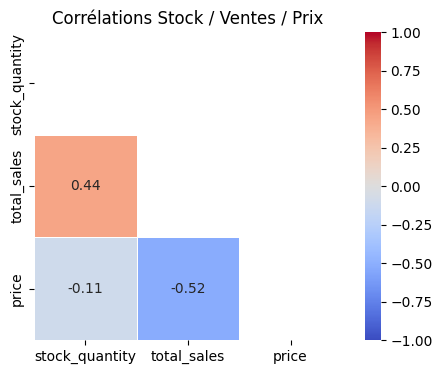

In [106]:
# Visualiser la heatmap des corrélations (Stock, Ventes, Prix)

cols_corr = ['stock_quantity', 'total_sales', 'price']
if all(c in df_final.columns for c in cols_corr):
    correlation_matrix = df_final[cols_corr].corr()

    # Masque pour le triangle supérieur
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(6, 4)) # Taille ajustée
    sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                annot=True, fmt=".2f", linewidths=.5, square=True)
    plt.title('Corrélations Stock / Ventes / Prix')
    plt.show()
else:
    print("Colonnes nécessaires pour la corrélation manquantes.")

# Que peut-on conclure des correlations ?
Stock plus élevé = Ventes plus élevées (corrélation modérée). La disponibilité du produit est importante.
Prix plus élevé = Ventes plus faibles (corrélation modérée à forte). Clients sensibles au prix.
Prix et Stock faiblement liés (corrélation faible). Un stock plus important tend à être associé à des prix plus bas.
L'équilibre entre prix, stock et ventes est crucial. Optimiser le stock, ajuster les prix, et utiliser les promotions stratégiquement.
Surveiller les données et ajuster les stratégies en continu pour maximiser les performances et la rentabilité.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [110]:
# Exporter le DataFrame final (df_final) vers un fichier Excel

# Définir le nom du fichier de sortie
nom_fichier_export = "analyse_bottleneck.xlsx"

# Exporter le DataFrame vers Excel, sans inclure l'index
try:
    df_final.to_excel(nom_fichier_export, index=False)
    print(f"\nLe DataFrame final a été exporté avec succès dans le fichier : '{nom_fichier_export}'")
except Exception as e:
    print(f"\nUne erreur est survenue lors de l'exportation vers Excel : {e}")


Le DataFrame final a été exporté avec succès dans le fichier : 'analyse_bottleneck.xlsx'
